
# Prever se uma pessoa ficará inadimplente em um futuro próximo

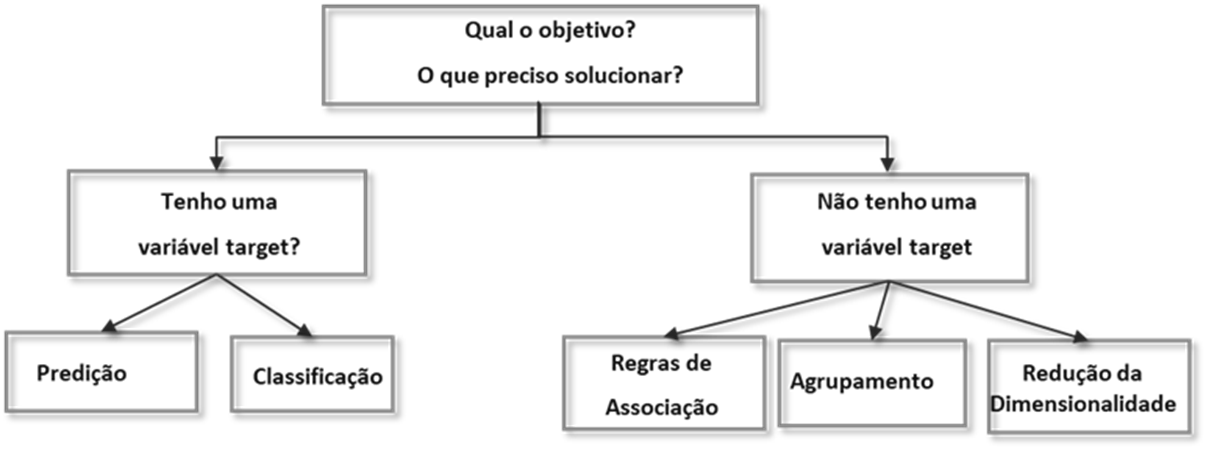

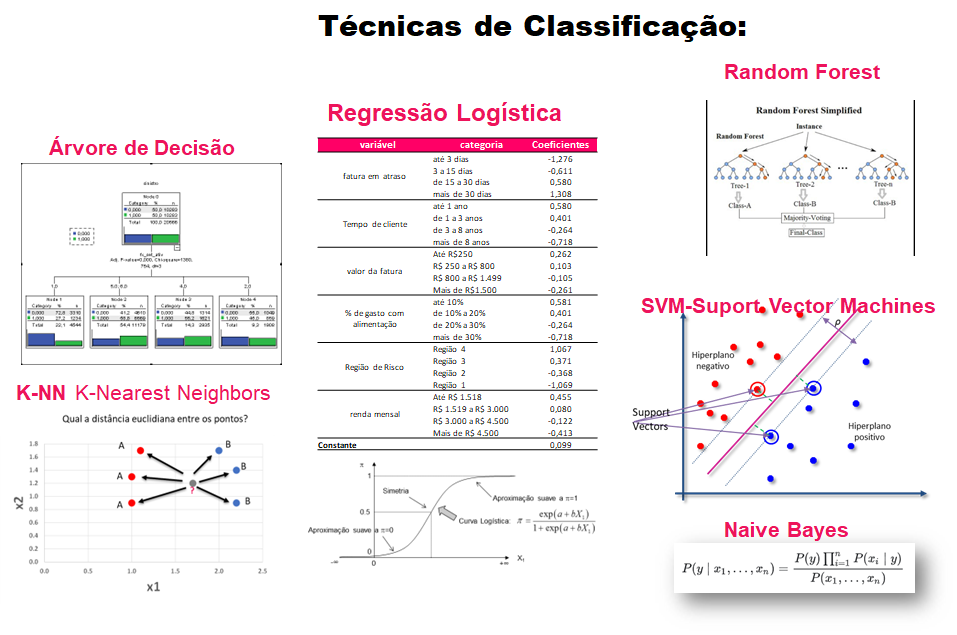

## Segmento Cartão de Crédito
#### A área de crédito deseja avaliar a propensão ao risco de seus clientes e implementar políticas de redução da inadimplência
#### Dicionário de variáveis¶


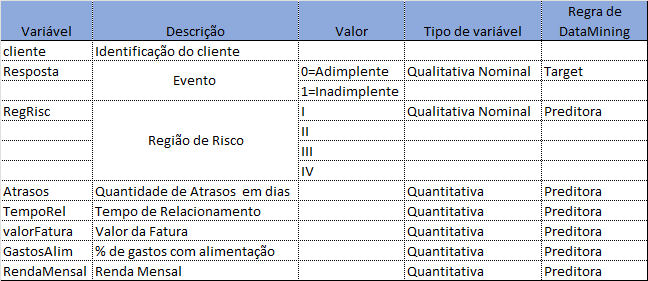

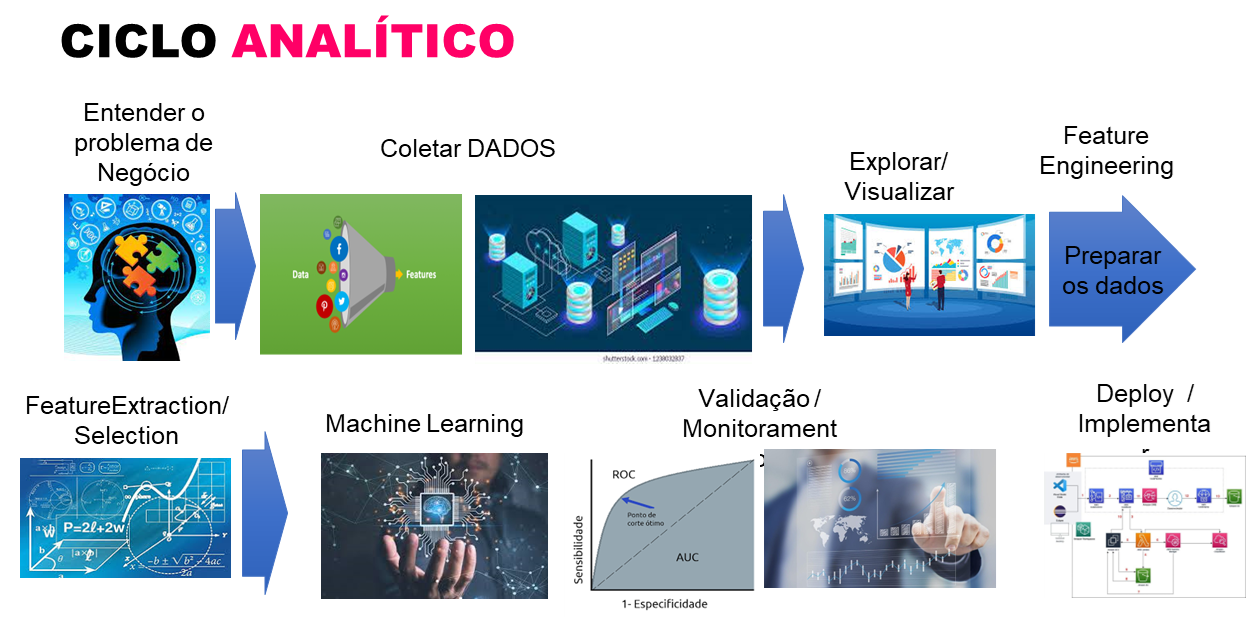

In [2]:
# Importar as bibliotecas
#!install seaborn
##! pip install seaborn

#!install scikit-learn
##! pip install scikit-learn


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve

# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importar os dados
Base_Inad = pd.read_csv("Inadimplencia_quantitativa_2.csv", sep=";")

print("Total number of transactions: "+ str(Base_Inad.shape[0]))
Base_Inad.head(5)


Total number of transactions: 10986


,cliente,Resposta,RegRisc,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,2,0,III,2,5148,62,4,4364
1,6,0,I,7,5030,163,17,4351
2,8,1,II,12,235,250,16,1375
3,9,1,I,37,300,381,64,1777
4,13,0,I,7,223,8055,10,3909


In [4]:
Base_Inad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      10986 non-null  int64 
 1   Resposta     10986 non-null  int64 
 2   RegRisc      10986 non-null  object
 3   Atrasos      10986 non-null  int64 
 4   TempoRel     10986 non-null  int64 
 5   valorFatura  10986 non-null  int64 
 6   GastosAlim   10986 non-null  int64 
 7   RendaMensal  10986 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 686.8+ KB


In [5]:
pd.DataFrame(zip(Base_Inad.isnull().sum(), Base_Inad.isnull().sum()/len(Base_Inad)), columns=['Count', 'Proportion'], index=Base_Inad.columns)


,Count,Proportion
cliente,0,0.0
Resposta,0,0.0
RegRisc,0,0.0
Atrasos,0,0.0
TempoRel,0,0.0
valorFatura,0,0.0
GastosAlim,0,0.0
RendaMensal,0,0.0


In [6]:
Base_Inad.describe()

,cliente,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,12947.128982,0.499090,19.687147,1796.758147,1400.987348,27.069634,6053.556800
std,7508.724663,0.500022,17.716952,1610.791743,2405.437586,22.992852,7434.910169
min,2.000000,0.000000,0.000000,180.000000,45.000000,0.000000,750.000000
25%,6499.000000,0.000000,4.000000,337.000000,207.000000,10.000000,1515.000000
50%,12884.500000,0.000000,15.000000,1144.500000,560.500000,22.000000,2991.000000
75%,19477.500000,1.000000,29.000000,2975.000000,1198.750000,31.000000,4527.250000
max,25984.000000,1.000000,65.000000,5475.000000,100000.000000,90.000000,29986.000000


In [7]:
# Tabela de frequência da variável Resposta do modelo
Resposta =pd.pivot_table(Base_Inad, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(Base_Inad, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/Base_Inad['cliente'].count())*100).round(2)

Resposta

,cliente,%
Resposta,,
0,5503,50.09
1,5483,49.91


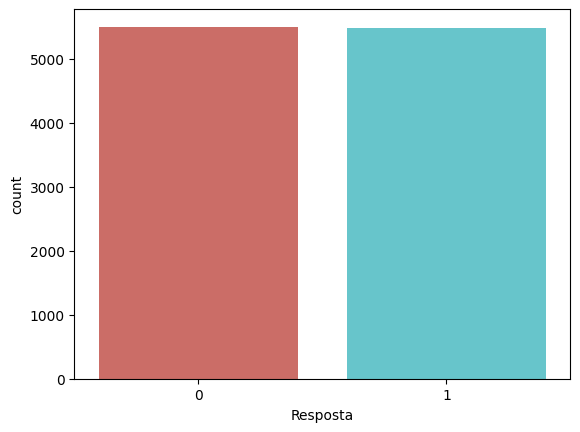

In [8]:
# Como estamos construindo um modelo para prever a Inadimplência de um cliente da rede:0=Adimplente 1=Inadimplente 
# Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.
 
sb.countplot(x='Resposta',data=Base_Inad, palette='hls');

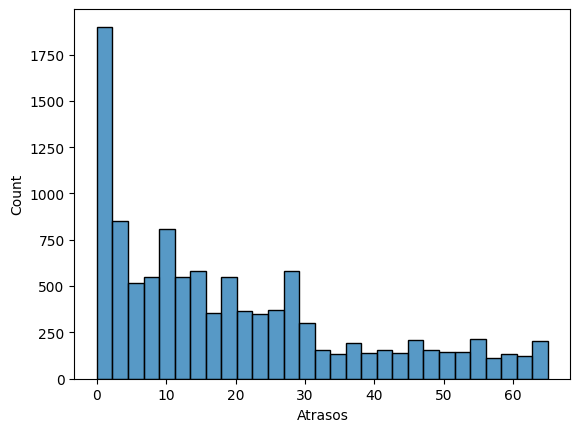

In [9]:
# Analisando as variáveis preditoras 

# Variável preditora: Atrasos

sb.histplot(data=Base_Inad, x="Atrasos");

<Axes: xlabel='Resposta', ylabel='Atrasos'>

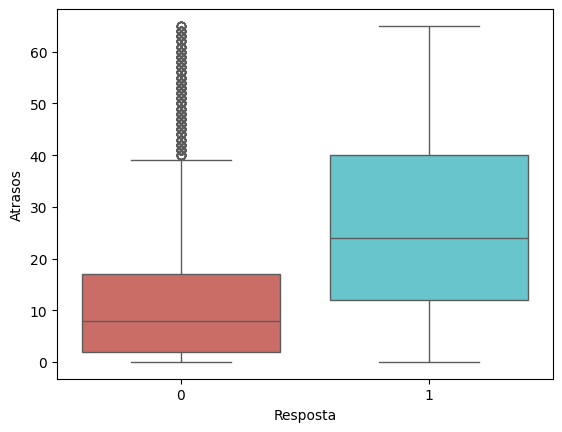

In [10]:
# Neste estudo o foco é a Inadimplência, assim....

sb.boxplot(x='Resposta', y='Atrasos', data=Base_Inad, palette='hls')

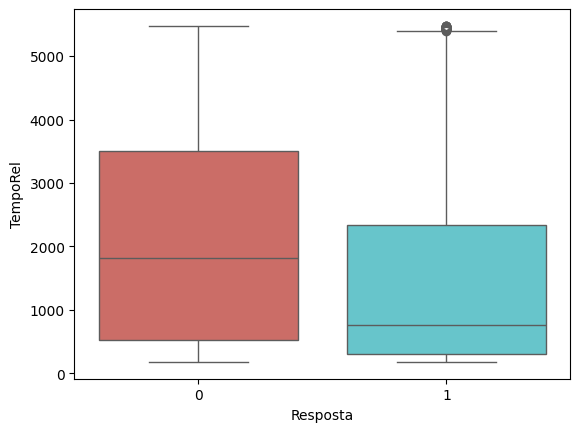

In [11]:
sb.boxplot(x='Resposta', y='TempoRel', data=Base_Inad, palette='hls');

In [12]:
# transformando a varíavel tempo de relacionamneto em anos
Base_Inad['TempoRel'] = Base_Inad['TempoRel']/365
Base_Inad.describe()

,cliente,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,12947.128982,0.499090,19.687147,4.922625,1400.987348,27.069634,6053.556800
std,7508.724663,0.500022,17.716952,4.413128,2405.437586,22.992852,7434.910169
min,2.000000,0.000000,0.000000,0.493151,45.000000,0.000000,750.000000
25%,6499.000000,0.000000,4.000000,0.923288,207.000000,10.000000,1515.000000
50%,12884.500000,0.000000,15.000000,3.135616,560.500000,22.000000,2991.000000
75%,19477.500000,1.000000,29.000000,8.150685,1198.750000,31.000000,4527.250000
max,25984.000000,1.000000,65.000000,15.000000,100000.000000,90.000000,29986.000000


<Axes: xlabel='Resposta', ylabel='valorFatura'>

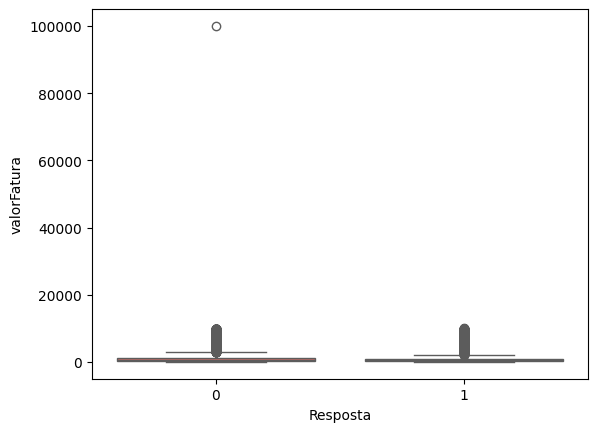

In [13]:
sb.boxplot(x='Resposta', y='valorFatura', data=Base_Inad, palette='hls')

In [14]:
# Uma opção sobre como eliminar outliers é achatamento de algum valor descrepante

Base_Inad.loc[Base_Inad['valorFatura']>=50000, 'valorFatura'] = 10000         

<Axes: xlabel='Resposta', ylabel='valorFatura'>

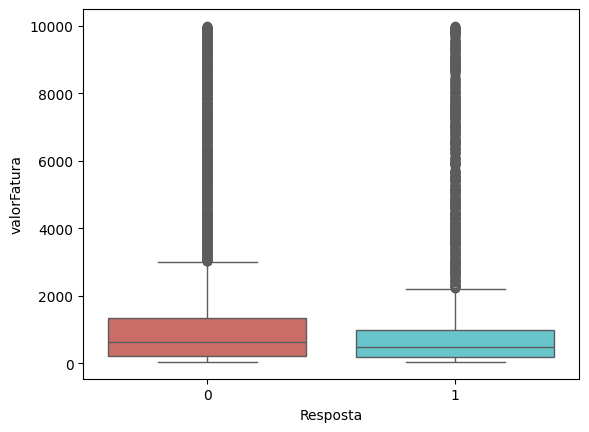

In [15]:
sb.boxplot(x='Resposta', y='valorFatura', data=Base_Inad, palette='hls')

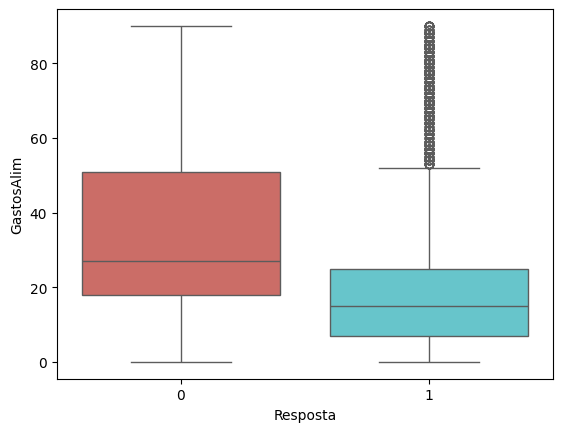

In [16]:
sb.boxplot(x='Resposta', y='GastosAlim', data=Base_Inad, palette='hls');

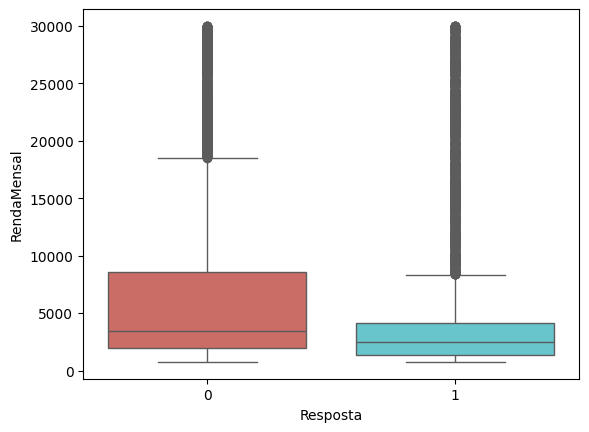

In [17]:
sb.boxplot(x='Resposta', y='RendaMensal', data=Base_Inad, palette='hls');

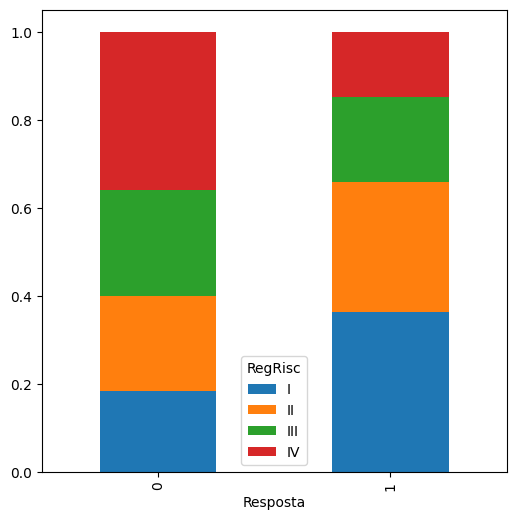

In [18]:
# comparison between Regrisk and target

RegRisc_cat = pd.crosstab(Base_Inad['Resposta'],Base_Inad['RegRisc'])
RegRisc_cat.div(RegRisc_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [19]:
# Converting categorical variables to a dummy indicators
RgRisk = pd.get_dummies(Base_Inad['RegRisc'],drop_first=True)
RgRisk.head()

,II,III,IV
0,False,True,False
1,False,False,False
2,True,False,False
3,False,False,False
4,False,False,False


In [20]:
# Alterando os dados
Base_Inad.drop(['cliente','RegRisc'],axis=1,inplace=True)
Base_Inad.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,0,2,14.104110,62,4,4364
1,0,7,13.780822,163,17,4351
2,1,12,0.643836,250,16,1375
3,1,37,0.821918,381,64,1777
4,0,7,0.610959,8055,10,3909


In [21]:
Base_Inad_dmy = pd.concat([Base_Inad,RgRisk],axis=1)
Base_Inad_dmy.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal,II,III,IV
0,0,2,14.104110,62,4,4364,False,True,False
1,0,7,13.780822,163,17,4351,False,False,False
2,1,12,0.643836,250,16,1375,True,False,False
3,1,37,0.821918,381,64,1777,False,False,False
4,0,7,0.610959,8055,10,3909,False,False,False


In [22]:
Base_Inad_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Resposta     10986 non-null  int64  
 1   Atrasos      10986 non-null  int64  
 2   TempoRel     10986 non-null  float64
 3   valorFatura  10986 non-null  int64  
 4   GastosAlim   10986 non-null  int64  
 5   RendaMensal  10986 non-null  int64  
 6   II           10986 non-null  bool   
 7   III          10986 non-null  bool   
 8   IV           10986 non-null  bool   
dtypes: bool(3), float64(1), int64(5)
memory usage: 547.3 KB


In [23]:
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento

X = Base_Inad_dmy.iloc[:,[1,2,3,4,5,6,7,8]].values
y = Base_Inad_dmy.iloc[:,0].values
X.shape, y.shape


((10986, 8), (10986,))

In [24]:
# Agora dividir em treino e teste (teste com 30%)


# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(Base_Inad_dmy.drop('Resposta',axis=1),Base_Inad_dmy['Resposta'],test_size=0.3, random_state=17)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

((7690, 8), (3296, 8))

In [25]:
 y_train.shape, y_test.shape

((7690,), (3296,))

In [26]:
 y_test.head()

641     0
4832    1
3338    1
7123    0
1040    1
Name: Resposta, dtype: int64

In [27]:
X_train.describe()

,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000
mean,19.898049,4.950542,1371.614564,26.900520,6047.780884
std,17.816291,4.439156,2172.949621,22.889441,7451.046533
min,0.000000,0.493151,45.000000,0.000000,750.000000
25%,5.000000,0.923973,209.000000,10.000000,1513.250000
50%,15.000000,3.198630,564.000000,22.000000,2973.000000
75%,29.000000,8.204110,1194.000000,30.750000,4491.000000
max,65.000000,15.000000,9999.000000,90.000000,29985.000000


# Magnitude das variáveis preditoras:
    
    Em função das características de alguns algoritmos há necessidade de realizar transfomação nas variáveis preditoras.

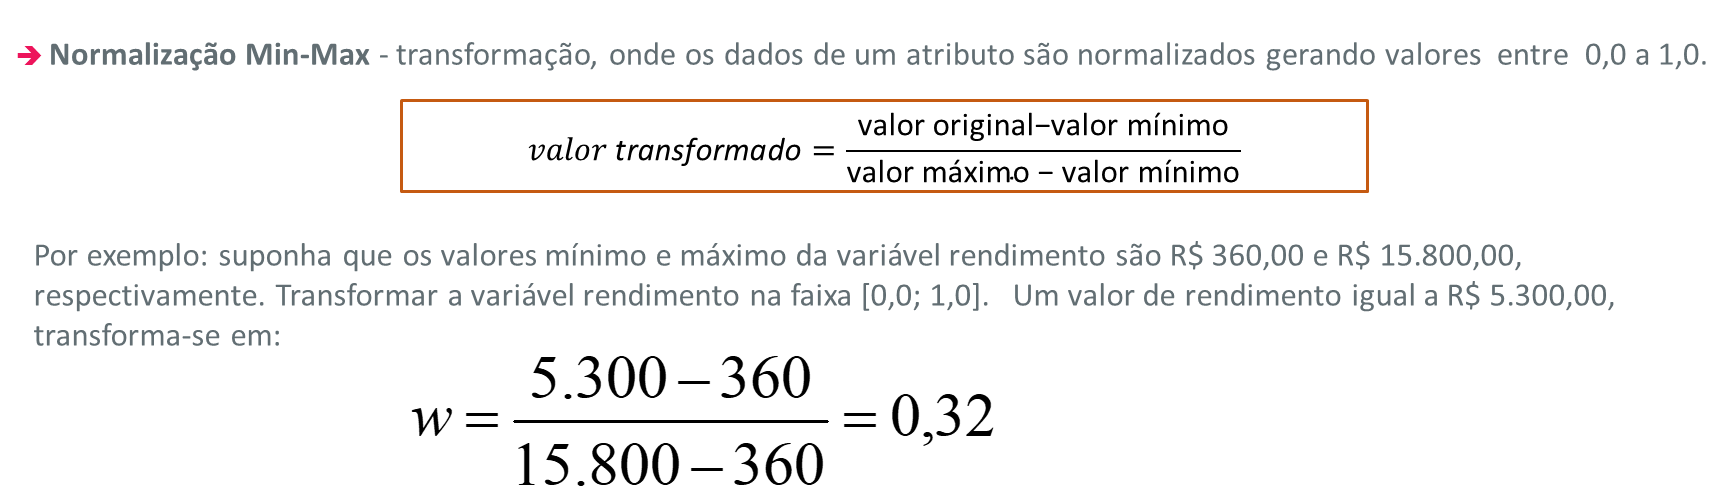

In [28]:
# Feature Scaling 
# Only on Independent Variable 

from sklearn.preprocessing import MinMaxScaler


MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)

X_test = MinMax.fit_transform(X_test)
X_train = pd.DataFrame(X_train, columns=['Atrasos','TempoRel','valorFatura','GastosAlim','RendaMensal','II','III','IV'])
X_train.head()



,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal,II,III,IV
0,0.015385,0.266100,0.090617,0.233333,0.077955,0.0,0.0,0.0
1,0.184615,0.910104,0.046514,0.711111,0.155088,0.0,0.0,0.0
2,0.338462,0.406043,0.020293,0.055556,0.028767,0.0,0.0,0.0
3,0.769231,0.110670,0.391501,0.222222,0.041320,0.0,0.0,1.0
4,0.261538,0.510482,0.105485,0.088889,0.067351,0.0,0.0,1.0


# 1.o MODELO: ÁRVORE DE DECISÃO 

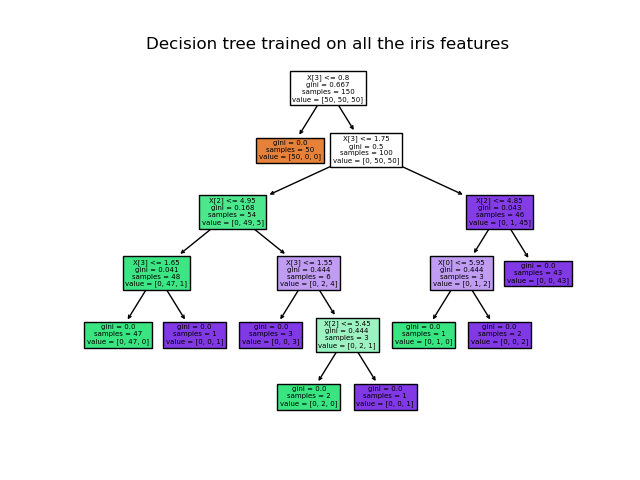

    Esses modelos de aprendizado supervisionado são empregados em tarefas tanto de regressão quanto classificação.
    O objetivo do método é criar uma árvore que aprende com os dados por meio de regras básicas, chamadas de if-then rules. 
    O modelo identifica qual é o melhor atributo para separar os dados utilizando o critério escolhido, que, neste caso, pode ser entropy ou gini.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


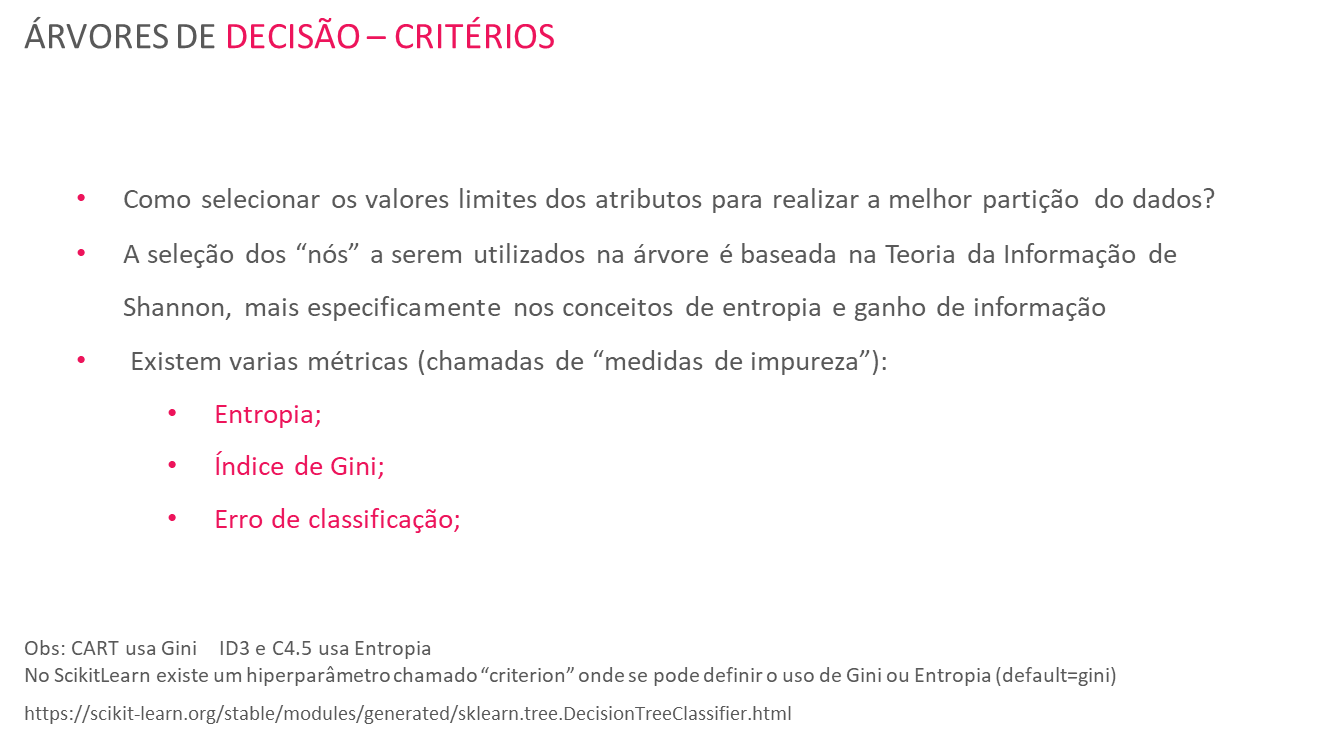

In [29]:
# Criando modelo 

Classif_tree = DecisionTreeClassifier()
 

#### Treinando o modelo de arvore de decisão:

In [30]:
classif = Classif_tree.fit(X_train, y_train)

# Como treinamos a árvore sem especificar nenhum parâmetro, 
# ela cresceu de forma indefinida e ficou grande demais impossibilitando a visualização da mesma.


In [31]:
# Verificando as features mais importantes para o modelo treinado:
classif.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.24776777, 0.14341572, 0.12691881, 0.1403726 , 0.21077638,
       0.02129477, 0.03090051, 0.07855343])

In [32]:
for feature,importancia in zip(X_train.columns,classif.feature_importances_):
    print("{}:{}".format(feature, importancia))

Atrasos:0.2477677723428274
TempoRel:0.14341571506256662
valorFatura:0.12691880967807143
GastosAlim:0.14037260466323787
RendaMensal:0.21077638110313607
II:0.021294772682425172
III:0.030900510764735028
IV:0.07855343370300055


In [33]:
# Testando o modelo
y_pred_all = classif.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_pred_all)
confusion_matrix


array([[1612,   29],
       [  25, 1630]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred_all))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1641
           1       0.98      0.98      0.98      1655

    accuracy                           0.98      3296
   macro avg       0.98      0.98      0.98      3296
weighted avg       0.98      0.98      0.98      3296



#### Parâmetros do classificador DecisionTreeClassifier

In [36]:
# criterion: medida de qualidade da divisão, aqui que definimos qual dessas métricas (Indice Gini, Chi-Square, Information Gain ou a redução da variância) iremos usar.
# splitter: estratégia utilizada para dividir o nó de decisão.
# max_depth: profundidade máxima da árvore.
# min_samples_split: número de amostras mínimas para considerar um nó para divisão.
# min_samples_leaf: número de amostras mínimas no nível folha.
# clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

# clf = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=0)

In [37]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0,
            random_state=17, splitter='best')

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       random_state=17)

In [38]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.37318249, 0.12891429, 0.03678068, 0.18209544, 0.15612548,
       0.        , 0.        , 0.12290162])

In [39]:
for feature,importancia in zip(X_train.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Atrasos:0.3731824940362283
TempoRel:0.1289142884861785
valorFatura:0.03678068282378275
GastosAlim:0.18209544168527353
RendaMensal:0.1561254763115112
II:0.0
III:0.0
IV:0.12290161665702576


In [40]:
# Testando o modelo
y_pred = clf.predict(X_test)

In [41]:
y_pred

# O código acima nos da a seguinte saída:

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

### Predição da Árvore de Decisão

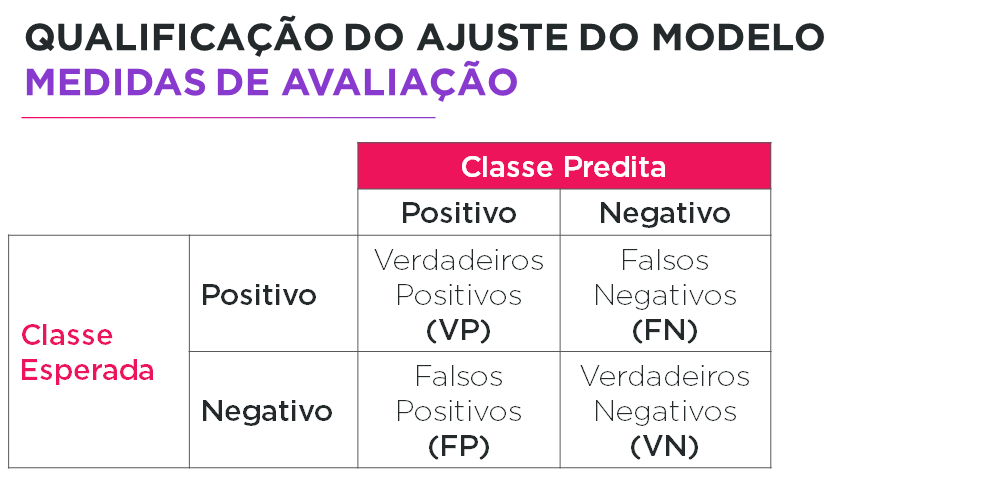

### Precision score = VP/(FP+VP))
### Recall score = VP/(FN+VP)
### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

link: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[1306,  335],
       [ 239, 1416]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1641
           1       0.81      0.86      0.83      1655

    accuracy                           0.83      3296
   macro avg       0.83      0.83      0.83      3296
weighted avg       0.83      0.83      0.83      3296



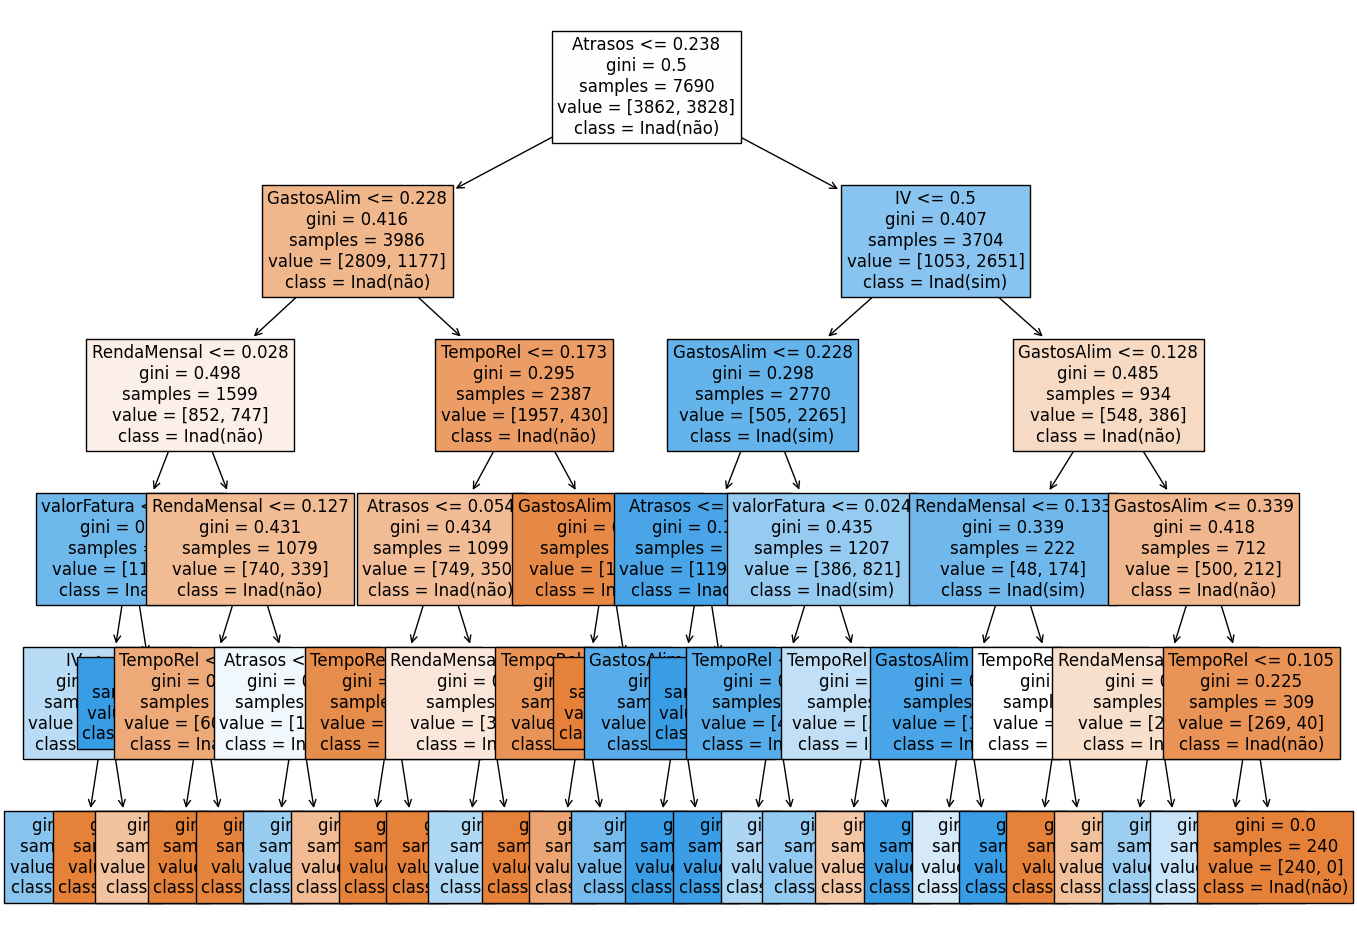

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names=['Atrasos', 'TempoRel', 'valorFatura', 'GastosAlim', 'RendaMensal', 'II',
       'III', 'IV'], fontsize=12,
filled=True,
class_names=['Inad(não)', 'Inad(sim)'])

# 2.o MODELO: REGRESSÃO LOGÍSTICA

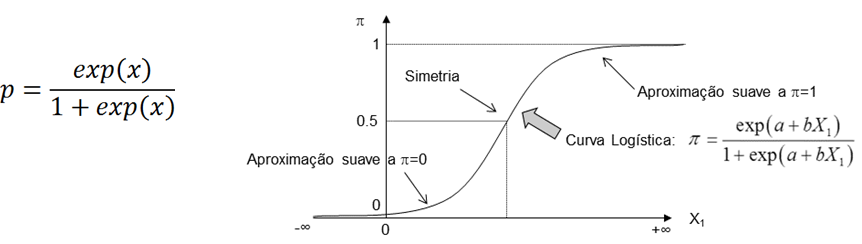

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [45]:
# Agora vamos refazer o modelo utilizando scikit-learn para maior facilidade de obter as métricas de ajuste.
# Agora vamos fazer com sklearn para aproveitar as métricas
#Predicting using Logistic Regression for Binary classification 


logreg = LogisticRegression(penalty='none', solver='newton-cg',random_state=17)


In [46]:
#Em seguida, você precisa treinar o seu modelo. Precisamos rodar a regressão para X_train e y_train:

# treina o modelo
logistica = logreg.fit(X_train, y_train)  #fitting the model 

In [47]:
print(logistica.coef_) 

[[ 3.73146189 -1.03077842 -1.075031   -2.99862905 -0.47894629 -0.62831795
  -1.11255387 -1.72185667]]


In [48]:
cols = X_train.columns


In [49]:
# Os coeficientes do modelo (b1,b2,b3....)

coefficients = pd.concat([pd.DataFrame(cols),pd.DataFrame(np.transpose(logistica.coef_))], axis = 1)
coefficients

,0,0
0,Atrasos,3.731462
1,TempoRel,-1.030778
2,valorFatura,-1.075031
3,GastosAlim,-2.998629
4,RendaMensal,-0.478946
5,II,-0.628318
6,III,-1.112554
7,IV,-1.721857


In [50]:
X_test

array([[1.07692308e-01, 9.12492912e-01, 1.43646409e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.38461538e-01, 5.67000567e-04, 1.44650929e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.53846154e-01, 1.15290115e-02, 1.11099950e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.07692308e-01, 2.87280287e-02, 9.26167755e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.23076923e-02, 8.54091854e-01, 6.17780010e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.76923077e-01, 4.31298431e-01, 6.41888498e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [51]:
# faz predicao e salva em y_pred
# y_pred_log = logreg.predict(X_test)
y_pred_log = logistica.predict(X_test)
y_pred_log

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [52]:
y_test

641      0
4832     1
3338     1
7123     0
1040     1
        ..
10900    0
10562    1
7890     1
5835     0
3443     1
Name: Resposta, Length: 3296, dtype: int64

In [53]:

# acuracia
logistica.score(X_test, y_test)


0.7654733009708737

In [54]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
confusion_matrix_log

array([[1256,  385],
       [ 388, 1267]], dtype=int64)

In [55]:
 print(classification_report(y_test, logistica.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1641
           1       0.77      0.77      0.77      1655

    accuracy                           0.77      3296
   macro avg       0.77      0.77      0.77      3296
weighted avg       0.77      0.77      0.77      3296



In [56]:
# Predizendo as probabilidades
yhat = logistica.predict_proba(X_test) #prediction
yhat

array([[0.98382999, 0.01617001],
       [0.27963593, 0.72036407],
       [0.35947684, 0.64052316],
       ...,
       [0.43006215, 0.56993785],
       [0.71767583, 0.28232417],
       [0.13750344, 0.86249656]])

In [57]:
y_pred_prob = yhat[:, 1] # manter somente para a classe positiva
y_pred_prob

array([0.01617001, 0.72036407, 0.64052316, ..., 0.56993785, 0.28232417,
       0.86249656])

# Modelos Ensemble


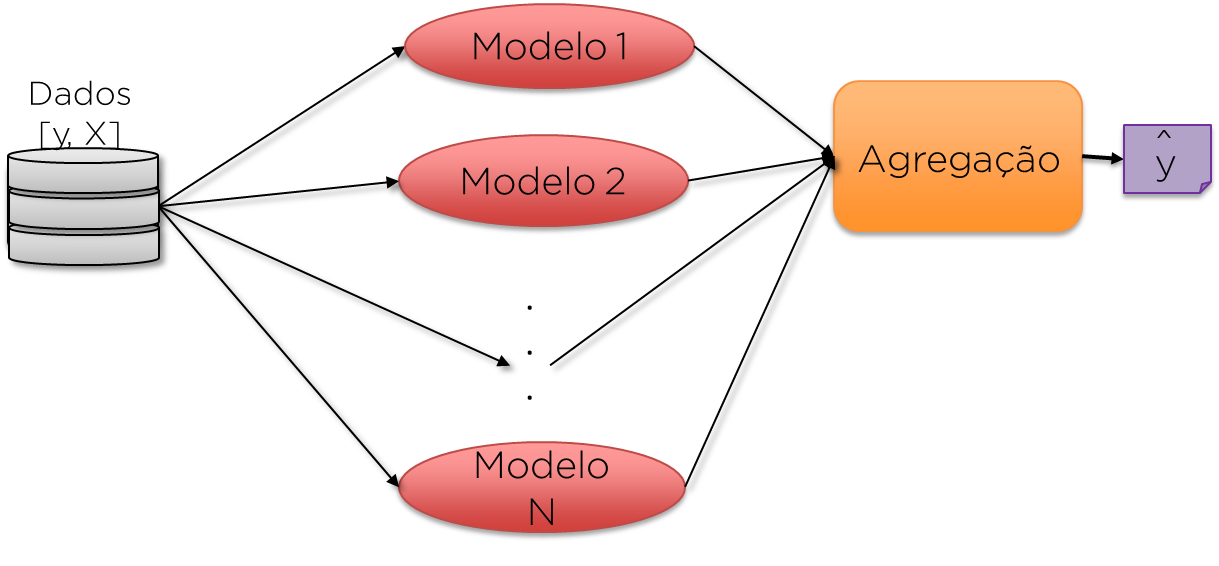

    Tipos de Modelos Ensemble
    Características Principais:
    Bagging geralmente usa mesmo tipo de modelos individuais, cada um de forma independente em relação ao outro, 
    de forma paralela. 
    O algoritmo final é então feito a partir de algum tipo de resultado médio do que foi obtido a partir dos modelos bases.

    Boosting geralmente usa mesmo tipo de modelos individuais, que são aplicados de forma sequencial (o posterior depende do antecessor) e depois combinados no modelo final.

    Stacking geralmente usa tipos diferentes de modelos individuais, treinando-os em paralelo.
    É então aplicado um modelo no output dos weak learners (podendo incluir ou não as features utilizadas para treiná-los).

# 3.o MODELO: Random Forest

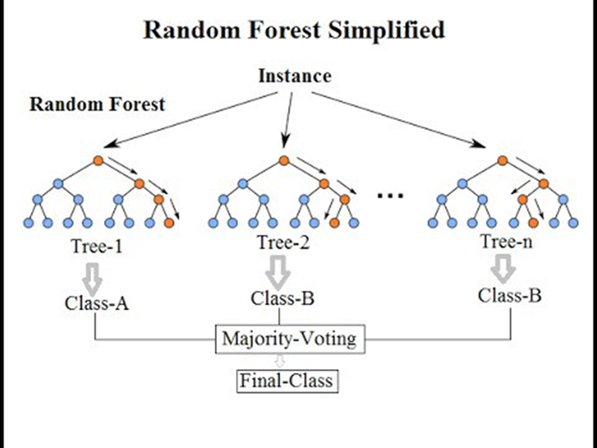

In [58]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1,random_state=17)
random_forest_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=3, n_estimators=5, n_jobs=-1, random_state=17)

In [59]:
y_predito = random_forest_model.predict(X_test)


In [60]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_RF = confusion_matrix(y_test, random_forest_model.predict(X_test))
confusion_matrix_RF

array([[1372,  269],
       [ 463, 1192]], dtype=int64)

In [61]:
for caracteristica, score in zip(X_train.columns, random_forest_model.feature_importances_):
  print('caracteristica {} e seu score {}'.format(caracteristica, score))

caracteristica Atrasos e seu score 0.227050923586713
caracteristica TempoRel e seu score 0.1219844591632508
caracteristica valorFatura e seu score 0.05389110199940665
caracteristica GastosAlim e seu score 0.38505211366401676
caracteristica RendaMensal e seu score 0.057938791197339135
caracteristica II e seu score 0.0
caracteristica III e seu score 0.025297568894975427
caracteristica IV e seu score 0.12878504149429815


In [62]:
print(classification_report(y_test, random_forest_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1641
           1       0.82      0.72      0.77      1655

    accuracy                           0.78      3296
   macro avg       0.78      0.78      0.78      3296
weighted avg       0.78      0.78      0.78      3296



# 4.o MODELO: Gradient Boosting¶

O Gradient Boosting é um outro tipo de algoritmo de Boosting.

Técnica de aprendizado de máquina para problemas de regressão e classificação, que produz um modelo de previsão na forma de um conjunto de modelos simples (baixa previsão), geralmente árvores de decisão.

Ele constrói o modelo em etapas. O objetivo do algoritmo é criar uma corrente de modelos fracos, onde cada um tem como objetivo minimizar o erro do modelo anterior, por meio de uma função de perda.

os erros são minimizado pelo algoritmo de gradiente descendente(gradient descending).

Aos ajustes de cada modelo fraco é multiplicado um valor chamado de taxa de aprendizagem. Esse valor, tem como objetivo determinar o impacto de cada árvore no modelo final. Quanto menor o valor, menor a contribuição de cada árvore.

In [63]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier


In [64]:
gradient_boost = GradientBoostingClassifier(random_state=17)

gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=17)

In [65]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, gradient_boost.predict(X_test))
confusion_matrix

array([[1488,  153],
       [ 212, 1443]], dtype=int64)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gradient_boost.predict(X_test)))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1641
           1       0.90      0.87      0.89      1655

    accuracy                           0.89      3296
   macro avg       0.89      0.89      0.89      3296
weighted avg       0.89      0.89      0.89      3296



# 5.o MODELO:  KNN K-Nearest Neighbors

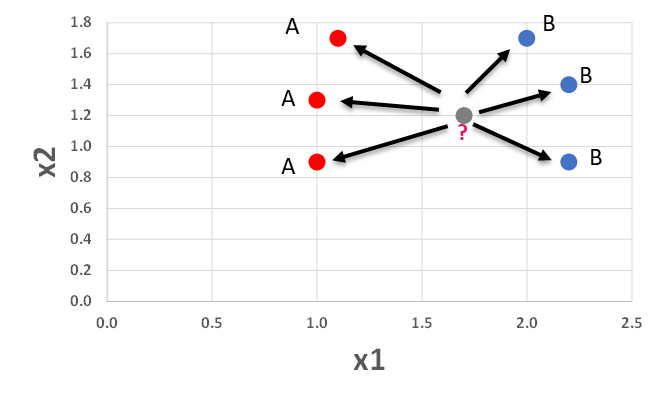

In [67]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier


KNN_classificador = KNeighborsClassifier(n_neighbors = 101)

KNN_classificador.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=101)

In [68]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_KNN = confusion_matrix(y_test, KNN_classificador.predict(X_test))
confusion_matrix_KNN

array([[1324,  317],
       [ 302, 1353]], dtype=int64)

In [69]:
print(classification_report(y_test, KNN_classificador.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1641
           1       0.81      0.82      0.81      1655

    accuracy                           0.81      3296
   macro avg       0.81      0.81      0.81      3296
weighted avg       0.81      0.81      0.81      3296



# 6.o MODELO: SVM Support Vector Machine


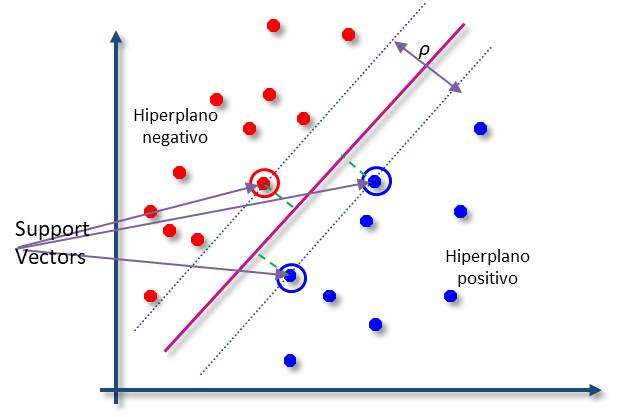

In [70]:
# Documentação de referência: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
from sklearn.svm import LinearSVC

modelo_SVM = LinearSVC(random_state=1234)
modelo_SVM.fit(X_train, y_train)

LinearSVC(random_state=1234)

In [71]:
y_predito = modelo_SVM.predict(X_test)

In [72]:
# matriz de confusao

confusion_matrix_SVM = confusion_matrix(y_test, y_predito)
confusion_matrix_SVM

array([[1244,  397],
       [ 386, 1269]], dtype=int64)

In [73]:
from sklearn import metrics

print("Acurácia: {}".format(metrics.accuracy_score(y_test, y_predito)))

Acurácia: 0.7624393203883495


In [74]:
 print(classification_report(y_test, modelo_SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1641
           1       0.76      0.77      0.76      1655

    accuracy                           0.76      3296
   macro avg       0.76      0.76      0.76      3296
weighted avg       0.76      0.76      0.76      3296

